This notebook contains code implentations of a lot of basic Reinforcement Learning. In this notebook I particulary showcase algorithms used to solve a very simplistic Reinforcement Learning problem : Multi Arm Bandits. The objective is to be able to select arm(action) to recieve the maximum possible reward out of K available arms.

We start by importing some libraries which we will be needing. Here I have imported Numpy to create arms with random average reward. We will also be using this generate the reward each time we pick a certain arm with some given variance. I have also imported pandas just in case we might need to create some dataframe. And at last I imported the Matplotlib and seaborn libraries to be able to plot graphs to view and compare performance of various algorithms.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now I have created a random number generator which we will be using create a normal reward distribution across arms and to generate a reward each time we pich a certain arm.

In [2]:
rng = np.random.default_rng(15)

I create normally distributed rewards for 10 arms with mean of the distribution being 0 and the standard deviation being 1.

In [3]:
actual_rewards = list(rng.normal(0, 1, 10))
actual_rewards

[-1.4308730228590871,
 -0.9365477163197146,
 0.3939383568003809,
 -0.5240866279019979,
 0.525616204517509,
 0.8073236234093464,
 -1.4435313882996355,
 1.017063788892187,
 -0.5956486475349956,
 2.0940849859026374]

Now I create a list for the estimation of the average reward of each arm and initialise it with zero

In [4]:
greedy_calculated_rewards = list(np.zeros(10))

I also create lists to record the number of times a particular arm was chosed, the percentage of times optimal action was chosen and the average reward after each selection of arm to be able to plot them later for comparison

In [5]:
greedy_counts = list(np.zeros(10))

In [6]:
greedy_percentage_optimal_actions = []

In [7]:
greedy_average_rewards = [0]

Greedy Algorithm

We first view at Greedy Algorithm where at each iteration, the arm with best estimated reward is chosen.

In [8]:
for i in range(1, 10001):
  #Selectig the best arm based on the highest estimated reward
    best_arm = (max(greedy_calculated_rewards))
    idx = greedy_calculated_rewards.index(best_arm)
    #Calculating the reward randomly using normal distribution with true reward as mean and standard deviation 1
    reward = rng.normal(actual_rewards[idx], 1)
    #Calculating the average reward
    average_reward = ((greedy_average_rewards[len(greedy_average_rewards) - 1] * (i-1)) + reward) / (i + 1)
    greedy_average_rewards.append(average_reward)
    #Increasing the count of number of times arm has been picked by 1
    greedy_counts[idx] += 1
    #Updating the percentage times optimal action has been chosen
    percent = greedy_counts[actual_rewards.index(max(actual_rewards))] / i
    greedy_percentage_optimal_actions.append(percent * 100)
    #Updating the estimated reward of the arm
    greedy_calculated_rewards[idx] = ((greedy_calculated_rewards[idx] * (greedy_counts[idx] - 1)) + reward) / greedy_counts[idx]

In [9]:
greedy_calculated_rewards

[-0.7021840813156665,
 -1.4755371469007896,
 0.4012609903374693,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [10]:
greedy_counts

[1.0, 1.0, 9998.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Plotting the average reward we recieve as number of iterations increase

(-3.0, 3.0)

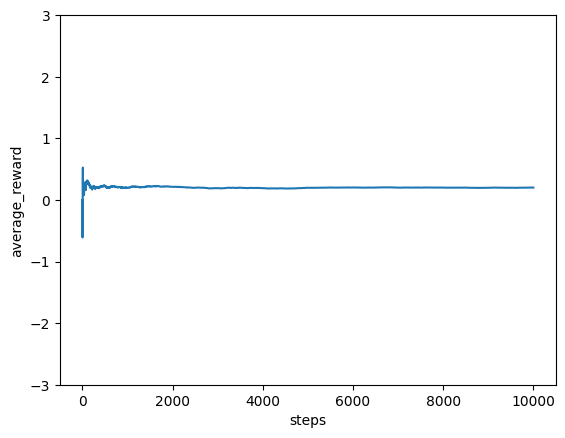

In [11]:
plt.plot(range(10001), greedy_average_rewards)
plt.xlabel("steps")
plt.ylabel("average_reward")
plt.ylim(-3, 3)

Plotting the percentage of times optimal arm was picked as number of iterations increase

Text(0.5, 0, 'steps')

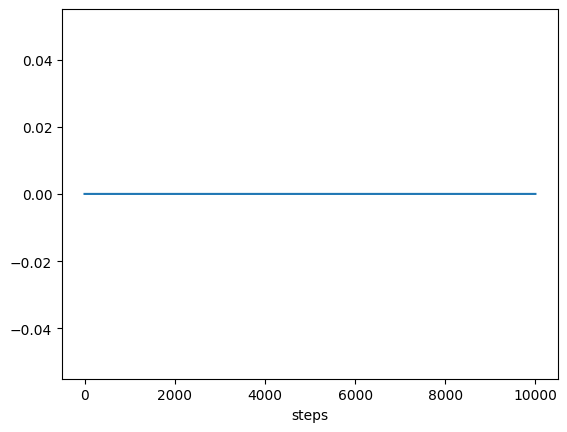

In [12]:
plt.plot(range(10000), greedy_percentage_optimal_actions)
plt.xlabel("steps")

Epsilon Greedy Algorithm

Now we will see Epsilon Greedy Algorithm which uses a paramter Epsilon such that the arm with probability Epsilon while we pick a random arm with probability 1-Epsilon

Epsilon = 0.1

We import the random library used to be able to pick the best estimated arm and random arm with probabilities Epsilon and 1-Epsilon

In [13]:
import random

I create a new list to store estimates of all arms for the Epsilon Greedy Algorithms. I also create lists to record the number of times a particular arm was chosed, the percentage of times optimal action was chosen and the average reward after each selection of arm to be able to plot them later for comparison

In [14]:
e_greedy_calculated_rewards = list(np.zeros(10))
e_greedy_counts = list(np.zeros(10))
e_greedy_percentage_optimal_actions = []
e_greedy_average_rewards = [0]

Now we run the Epsilon Greedy Algorithm 10000 times and store it's performance.

In [15]:
for i in range(1, 10001):
  #Selecting the best arm with probability 0.9 and a random arm with probability 0.1
    selection = random.choices([0, 1], weights=[0.9, 0.1])[0]
    if selection == 0:
        best_arm = (max(e_greedy_calculated_rewards))
        idx = e_greedy_calculated_rewards.index(best_arm)
    else:
        idx = np.random.randint(0, 10)
    #Calculating the reward randomly using normal distribution with true reward of the arm as mean and standard deviation 1
    reward = rng.normal(actual_rewards[idx], 1)
    #Calculating average of all rewards recieved till iteration i
    average_reward = ((e_greedy_average_rewards[len(e_greedy_average_rewards) - 1] * (i-1)) + reward) / (i + 1)
    e_greedy_average_rewards.append(average_reward)
    #Increasing the count of number of times arm has been picked by 1
    e_greedy_counts[idx] += 1
    #Updating the percentage times optimal action has been chosen
    percent = e_greedy_counts[actual_rewards.index(max(actual_rewards))] / i
    e_greedy_percentage_optimal_actions.append(percent * 100)
    #Updating the estimated reward of the arm
    e_greedy_calculated_rewards[idx] = ((e_greedy_calculated_rewards[idx] * (e_greedy_counts[idx] - 1)) + reward) / e_greedy_counts[idx]

In [16]:
e_greedy_counts

[104.0, 112.0, 119.0, 103.0, 105.0, 113.0, 113.0, 103.0, 87.0, 9041.0]

Now we plot the average reward recieved over time to check the performance of the algorithm

(-3.0, 3.0)

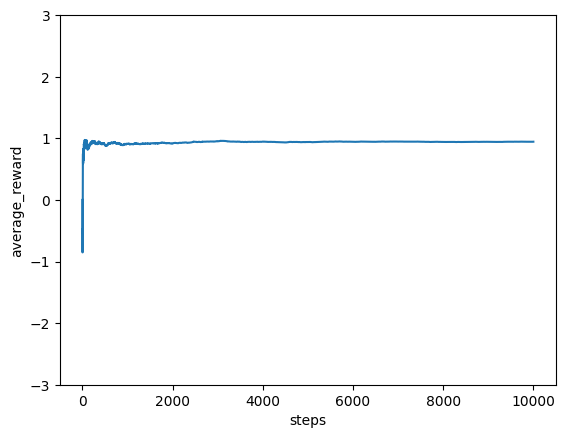

In [17]:
plt.plot(range(10001), e_greedy_average_rewards)
plt.xlabel("steps")
plt.ylabel("average_reward")
plt.ylim(-3, 3)

We also plot the percentage of times the optimal arm was selected as time increases.

Text(0.5, 0, 'steps')

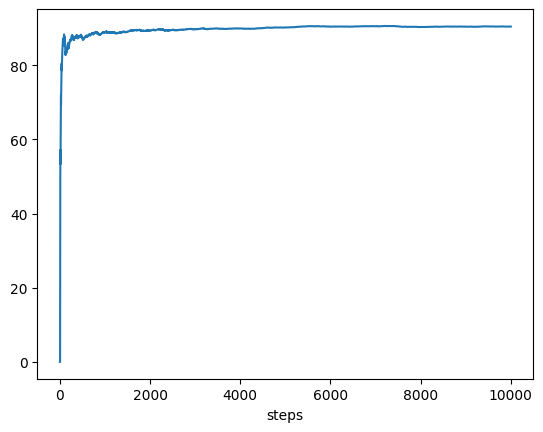

In [18]:
plt.plot(range(10000), e_greedy_percentage_optimal_actions)
plt.xlabel("steps")

Now we perform the same algorithm by reducing the parameter Epsilon i.e reducing the the number of times a random arm will be chosen. This means that the algorithm would exploit more and explore less.

Epsilon = 0.01

I create a new list to store estimates of all arms for the Epsilon Greedy Algorithms. I also create lists to record the number of times a particular arm was chosed, the percentage of times optimal action was chosen and the average reward after each selection of arm to be able to plot them later for comparison

In [19]:
new_e_greedy_calculated_rewards = list(np.zeros(10))
new_e_greedy_counts = list(np.zeros(10))
new_e_greedy_percentage_optimal_actions = []
new_e_greedy_average_rewards = [0]

We run the alogrithm again for 10000 times to compute the results.

In [20]:
for i in range(1, 10001):
  #The algorithm works same as the last time  with the only difference being the change in the probabiltiy of picking the best arm and a random arm to 0.99 and 0.1
    selection = random.choices([0, 1], weights=[0.99, 0.01])[0]
    if selection == 0:
        best_arm = (max(new_e_greedy_calculated_rewards))
        idx = new_e_greedy_calculated_rewards.index(best_arm)
    else:
        idx = np.random.randint(0, 10)
    reward = rng.normal(actual_rewards[idx], 1)
    average_reward = ((new_e_greedy_average_rewards[len(new_e_greedy_average_rewards) - 1] * (i-1)) + reward) / (i + 1)
    new_e_greedy_average_rewards.append(average_reward)
    new_e_greedy_counts[idx] += 1
    percent = new_e_greedy_counts[actual_rewards.index(max(actual_rewards))] / i
    new_e_greedy_percentage_optimal_actions.append(percent * 100)
    new_e_greedy_calculated_rewards[idx] = ((new_e_greedy_calculated_rewards[idx] * (new_e_greedy_counts[idx] - 1)) + reward) / new_e_greedy_counts[idx]

In [21]:
new_e_greedy_counts

[11.0, 9.0, 15.0, 14.0, 6.0, 175.0, 7.0, 11.0, 11.0, 9741.0]

Now we will again plot the graphs to view the performance of the algorithm.

(-3.0, 3.0)

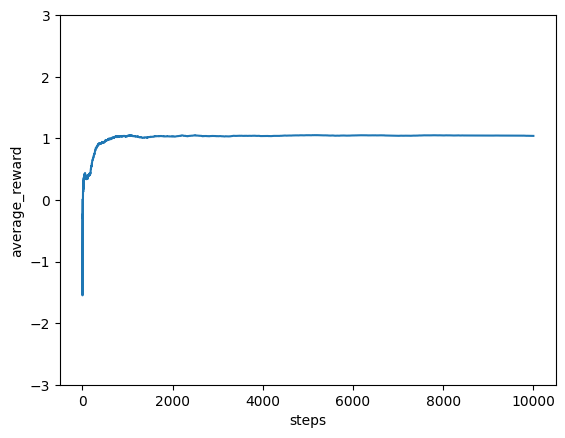

In [22]:
plt.plot(range(10001), new_e_greedy_average_rewards)
plt.xlabel("steps")
plt.ylabel("average_reward")
plt.ylim(-3, 3)

Text(0.5, 0, 'steps')

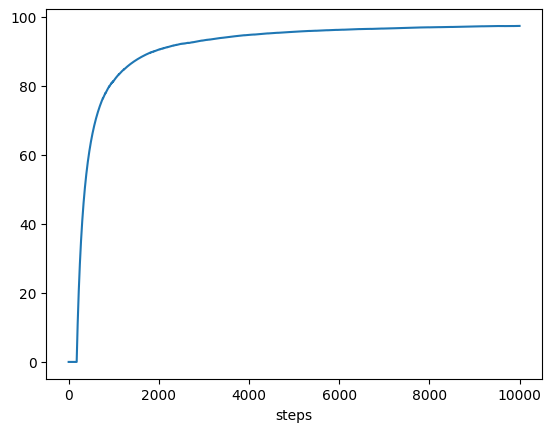

In [23]:
plt.plot(range(10000), new_e_greedy_percentage_optimal_actions)
plt.xlabel("steps")

COMPARING ALL THREE

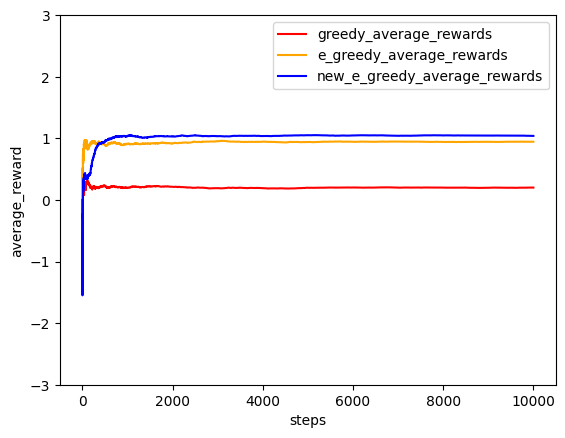

In [24]:
plt.plot(greedy_average_rewards, c='red', label=("greedy_average_rewards"))
plt.plot(e_greedy_average_rewards, c='orange', label=("e_greedy_average_rewards"))
plt.plot(new_e_greedy_average_rewards, c='blue', label=("new_e_greedy_average_rewards"))
plt.xlabel("steps")
plt.ylabel("average_reward")
plt.ylim(-3, 3)
plt.legend();

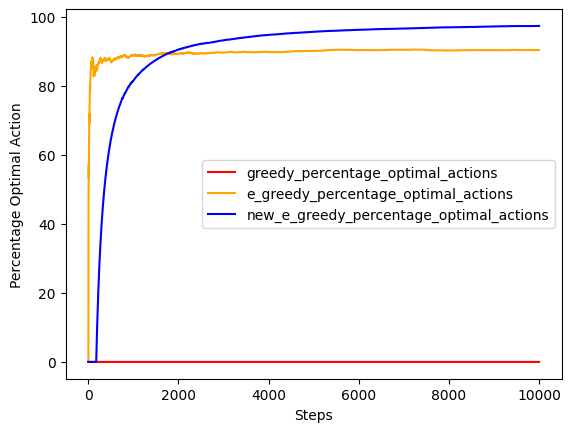

In [25]:
plt.plot(greedy_percentage_optimal_actions, c='red', label=("greedy_percentage_optimal_actions"))
plt.plot(e_greedy_percentage_optimal_actions, c='orange', label=("e_greedy_percentage_optimal_actions"))
plt.plot(new_e_greedy_percentage_optimal_actions, c='blue', label=("new_e_greedy_percentage_optimal_actions"))
plt.ylabel("Percentage Optimal Action")
plt.xlabel("Steps")
plt.legend();

Optimistic Initial Value

In [26]:
optimistic_greedy_calculated_rewards = [5]*10
optimistic_greedy_counts = list(np.zeros(10))
optimistic_greedy_percentage_optimal_actions = []
optimistic_greedy_average_rewards = [0]

In [27]:
for i in range(1, 10001):
    best_arm = (max(optimistic_greedy_calculated_rewards))
    idx = optimistic_greedy_calculated_rewards.index(best_arm)
    reward = rng.normal(actual_rewards[idx], 1)
    average_reward = ((optimistic_greedy_average_rewards[len(optimistic_greedy_average_rewards) - 1] * (i-1)) + reward) / (i + 1)
    optimistic_greedy_average_rewards.append(average_reward)
    optimistic_greedy_counts[idx] += 1
    percent = optimistic_greedy_counts[actual_rewards.index(max(actual_rewards))] / i
    optimistic_greedy_percentage_optimal_actions.append(percent * 100)
    optimistic_greedy_calculated_rewards[idx] = ((optimistic_greedy_calculated_rewards[idx] * (optimistic_greedy_counts[idx] - 1)) + reward) / optimistic_greedy_counts[idx]

In [28]:
optimistic_greedy_calculated_rewards

[-1.22263163362482,
 -0.1267346951273095,
 -0.6436045496505449,
 0.8097914282032773,
 0.361436371054088,
 -0.3421038850098246,
 -2.350801411500573,
 0.15612664330342363,
 -0.5957208263021518,
 2.096763439113317]

In [29]:
actual_rewards

[-1.4308730228590871,
 -0.9365477163197146,
 0.3939383568003809,
 -0.5240866279019979,
 0.525616204517509,
 0.8073236234093464,
 -1.4435313882996355,
 1.017063788892187,
 -0.5956486475349956,
 2.0940849859026374]

In [30]:
optimistic_greedy_counts

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 9991.0]

(-3.0, 3.0)

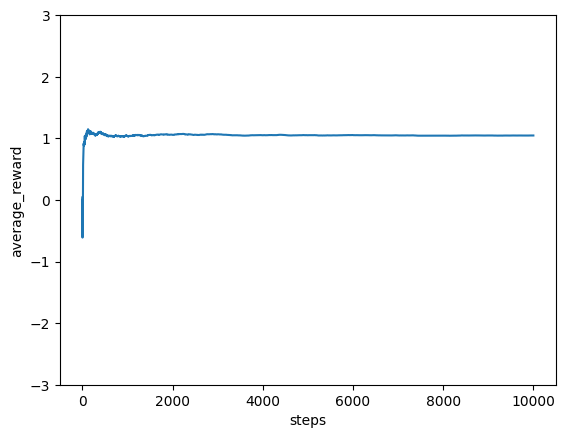

In [31]:
plt.plot(optimistic_greedy_average_rewards)
plt.xlabel("steps")
plt.ylabel("average_reward")
plt.ylim(-3, 3)

Text(0, 0.5, 'percentage_optimal_actions')

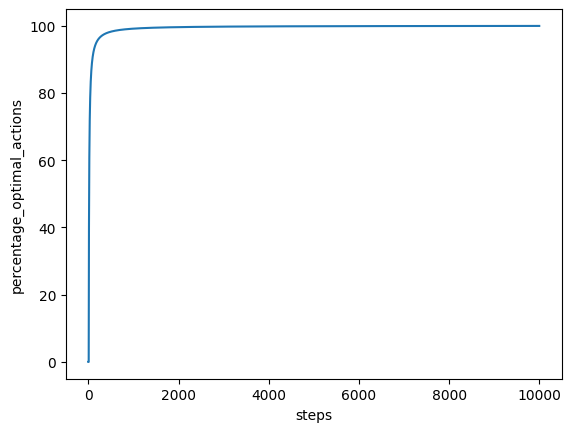

In [32]:
plt.plot(optimistic_greedy_percentage_optimal_actions)
plt.xlabel("steps")
plt.ylabel("percentage_optimal_actions")

Now we will compare the performance of all the algorithms by plotting their average reward and percentage of picking optimal action simultaneously.

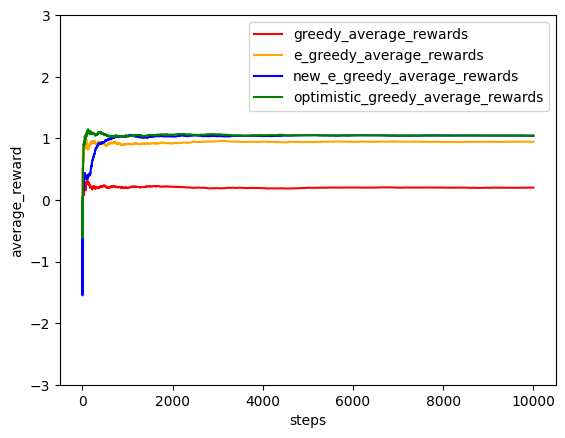

In [33]:
plt.plot(greedy_average_rewards, c='red', label=("greedy_average_rewards"))
plt.plot(e_greedy_average_rewards, c='orange', label=("e_greedy_average_rewards"))
plt.plot(new_e_greedy_average_rewards, c='blue', label=("new_e_greedy_average_rewards"))
plt.plot(optimistic_greedy_average_rewards, c='green', label=("optimistic_greedy_average_rewards"))
plt.xlabel("steps")
plt.ylabel("average_reward")
plt.ylim(-3, 3)
plt.legend();

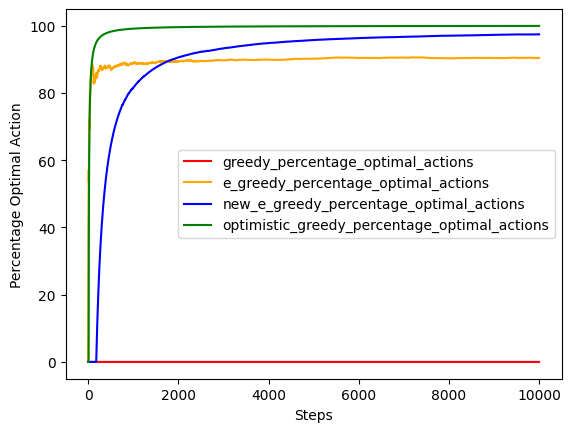

In [34]:
plt.plot(greedy_percentage_optimal_actions, c='red', label=("greedy_percentage_optimal_actions"))
plt.plot(e_greedy_percentage_optimal_actions, c='orange', label=("e_greedy_percentage_optimal_actions"))
plt.plot(new_e_greedy_percentage_optimal_actions, c='blue', label=("new_e_greedy_percentage_optimal_actions"))
plt.plot(optimistic_greedy_percentage_optimal_actions, c='green', label=("optimistic_greedy_percentage_optimal_actions"))
plt.ylabel("Percentage Optimal Action")
plt.xlabel("Steps")
plt.legend();